In [1]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from inference import (
reconstruct_keypoints, draw_keypoints, match_descriptors, visualize_matches)


In [ ]:
def process_and_draw_keypoints(img_path, features):
    data = features[os.path.basename(img_path)]
    kp = reconstruct_keypoints(data["keypoints"])
    desc = np.array(data["descriptors"], dtype=np.uint8)

    draw_keypoints(img_path, kp)
    return kp, desc


def match_and_visualize(img1_path, img2_path, kp1, desc1, kp2, desc2, num_matches=30):
    good_matches = match_descriptors(desc1, desc2, num_matches=num_matches)
    print(f"Matched {len(good_matches)} keypoints between the images.")
    visualize_matches(img1_path, img2_path, kp1, kp2, good_matches)
    return good_matches


In [ ]:
features_path = "../features.pkl" # you should run train.py to get this file
img1_path = "../data/2018/T36UXA_20180904T083549_TCI.png"
img2_path = "../data/2018/T36UXA_20180919T083621_TCI.png"

In [3]:
with open(features_path, "rb") as f:
    features = pickle.load(f)

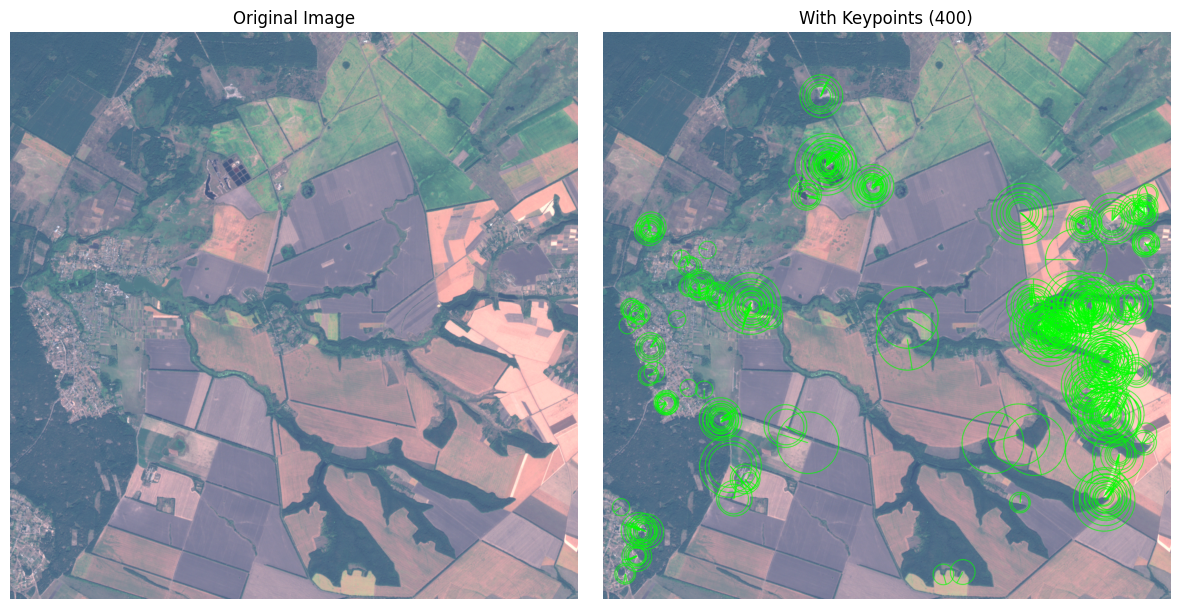

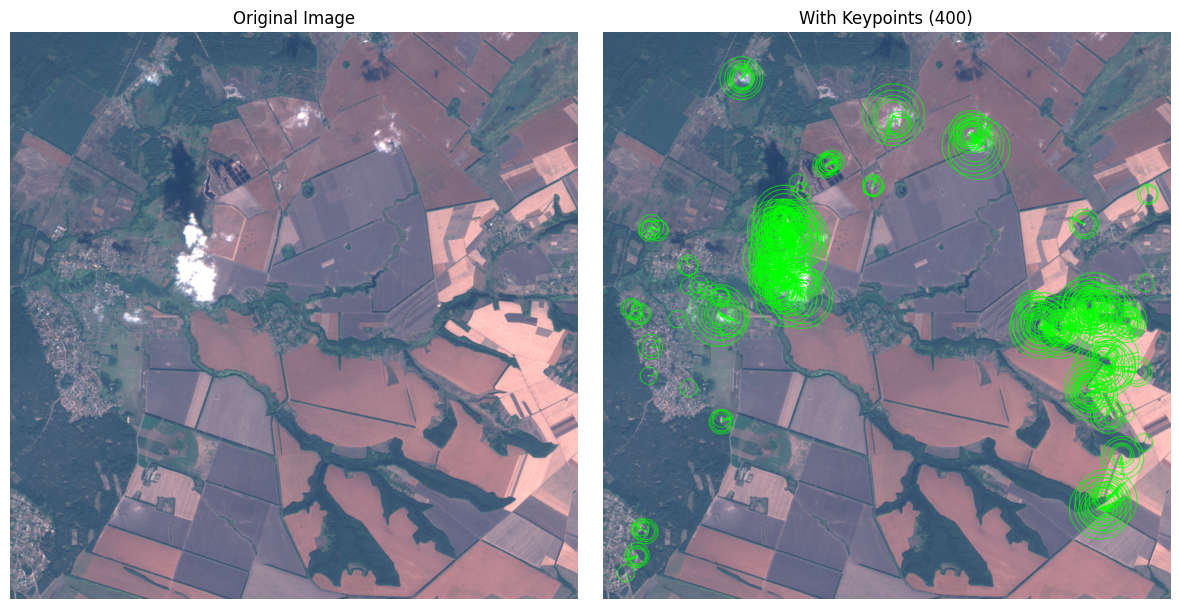

In [8]:
kp1, desc1 = process_and_draw_keypoints(img1_path, features)
kp2, desc2 = process_and_draw_keypoints(img2_path, features)



As seen in the images, the keypoint clusters are somewhat similar, forming comparable patterns. However, it is important to note that in the image containing a cloud, a large number of keypoints are detected in the cloudy area, unlike in the first image. This can occurs because feature detectors identify significant changes in texture or brightness

Matched 30 keypoints between the images.


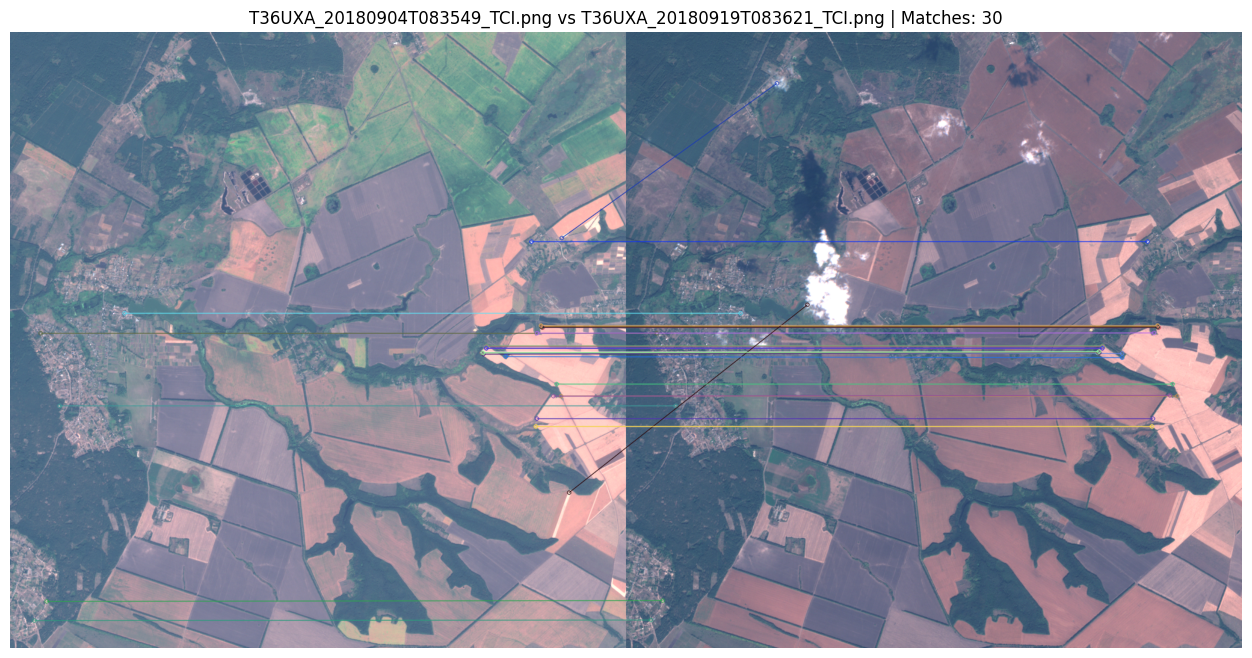

In [12]:
good_matches = match_and_visualize(img1_path, img2_path, kp1, desc1, kp2, desc2, num_matches=30)

In the feature matching image, we can see that most of the matchers between the two images are almost identical, with only a few differences. This can be observed in the area with the cloud
___


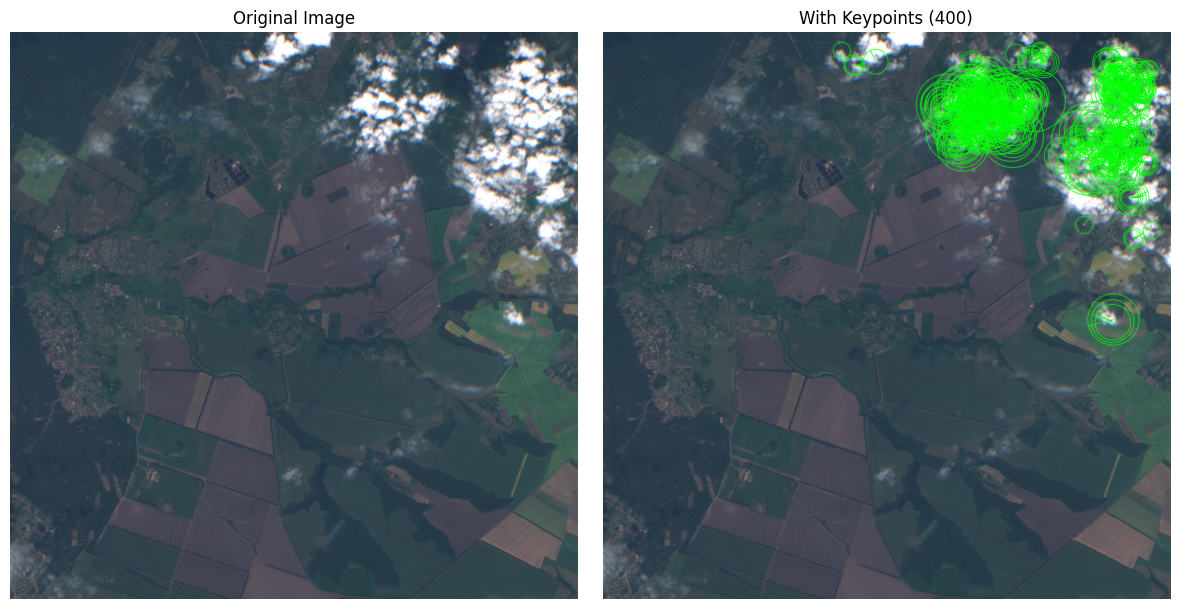

In [13]:
img3_path = "../data/2018/T36UXA_20180815T084009_TCI.png"
kp3, desc3 = process_and_draw_keypoints(img3_path, features)

Here we can see that the cluster was formed only in the area with clouds, while it is absent in other regions.


Matched 30 keypoints between the images.


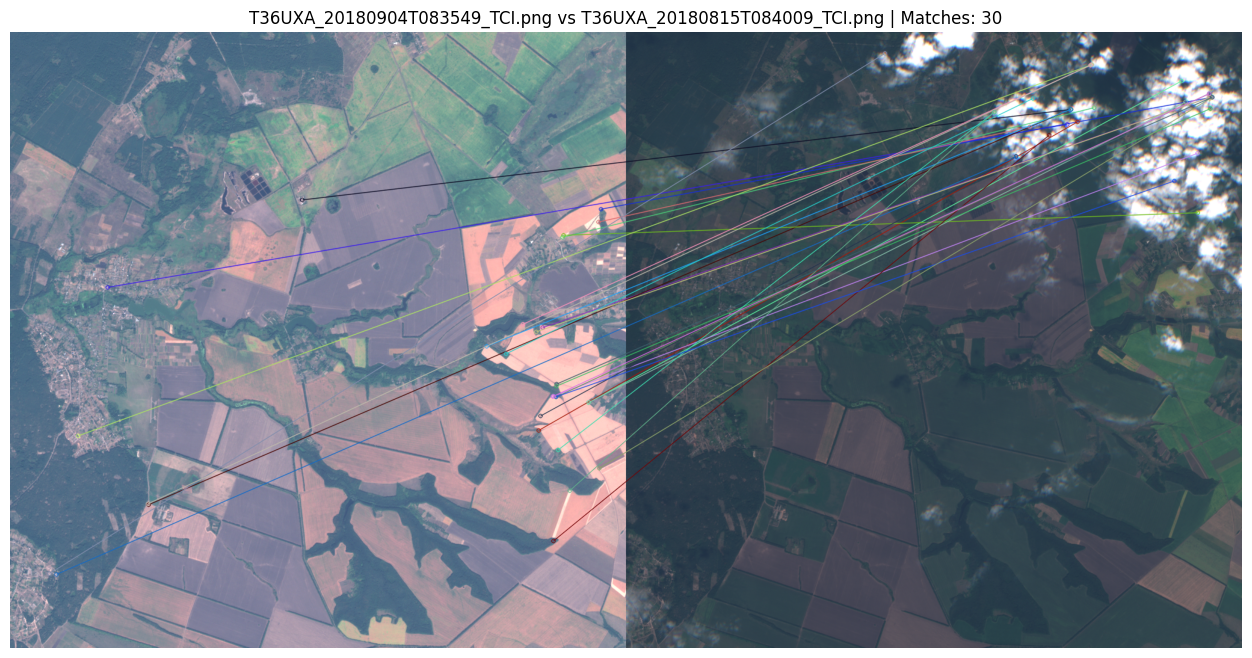

In [14]:
good_matches = match_and_visualize(img1_path, img3_path, kp1, desc1, kp3, desc3, num_matches=30)

As a result, there are no valid matches for this image, which is related to the issue mentioned earlier.
____


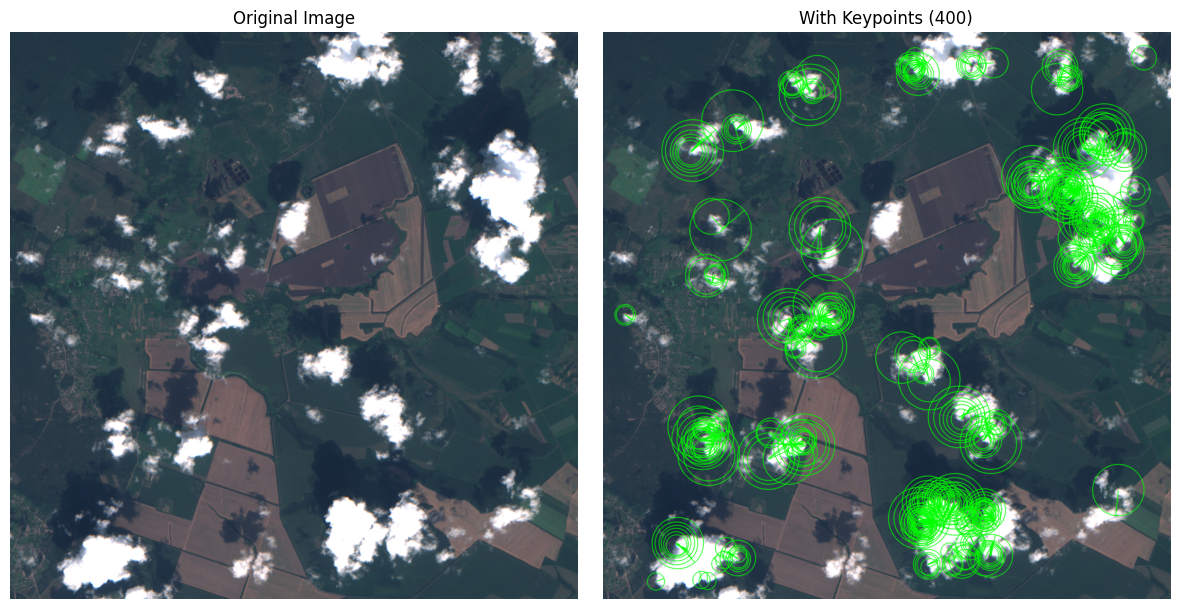

In [15]:
img4_path = "../data/2018/T36UXA_20180805T083559_TCI.png"
kp4, desc4 = process_and_draw_keypoints(img4_path, features)

Matched 30 keypoints between the images.


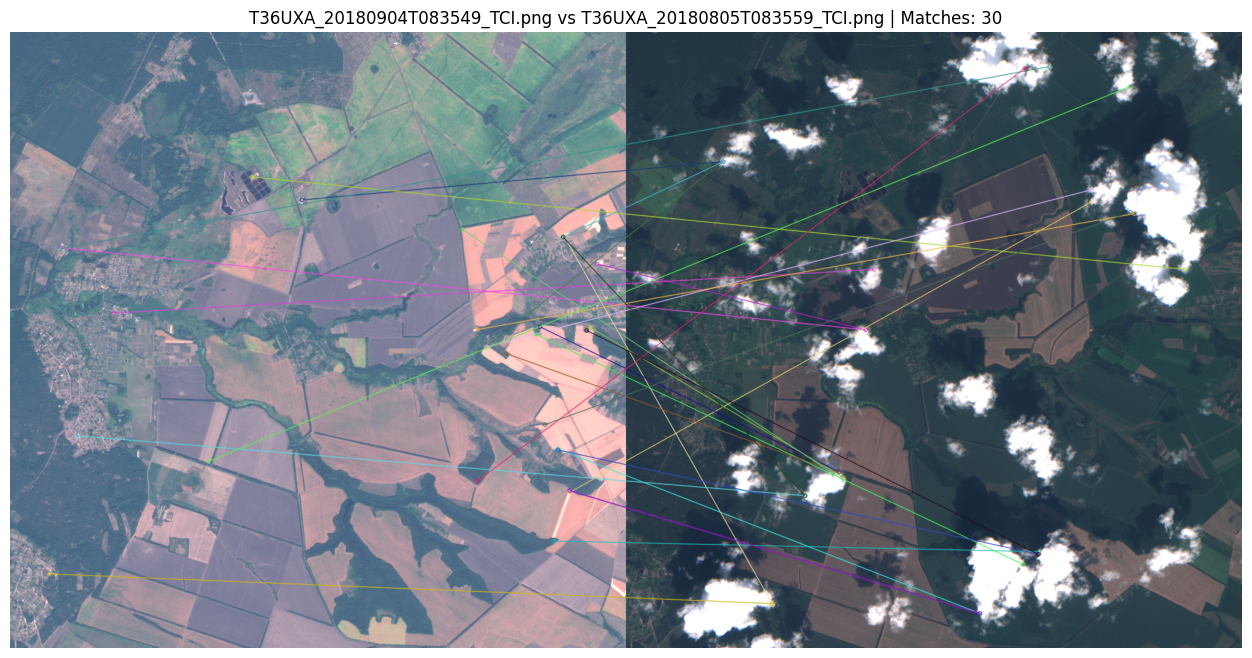

In [16]:
good_matches = match_and_visualize(img1_path, img4_path, kp1, desc1, kp4, desc4, num_matches=30)

This example confirms that most keypoints are concentrated on the cloud areas. This is likely due to the nature of the ORB descriptor, which is sensitive to brightness changes. As a result, these regions produce unstable matches and reduce overall matching quality.
